# Import Libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [161]:
df= pd.read_csv('fires_data_11-29-2021.csv')
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
1,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
2,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
3,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1993,1993,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
4,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1994,1994,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN


# Shape of data

In [162]:
row, cols= df.shape
print("Number of rows:", row)
print("Number of columns:", cols)

Number of rows: 47649
Number of columns: 17


# Data types

In [163]:
df.dtypes

Domain Code          object
Domain               object
Area Code (ISO3)     object
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Source Code           int64
Source               object
Unit                 object
Value               float64
Flag                 object
Flag Description     object
Note                float64
dtype: object

# Check missing values

In [164]:
df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (ISO3)        0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Source Code             0
Source                  0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                47649
dtype: int64

# Dropping unnecessary columns

In [165]:
df.drop(['Note','Domain Code','Element Code','Item Code','Flag Description','Flag','Source Code'], axis=1, inplace=True)

#### Dataset Structure

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47649 entries, 0 to 47648
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain            47649 non-null  object 
 1   Area Code (ISO3)  47649 non-null  object 
 2   Area              47649 non-null  object 
 3   Element           47649 non-null  object 
 4   Item              47649 non-null  object 
 5   Year Code         47649 non-null  int64  
 6   Year              47649 non-null  int64  
 7   Source            47649 non-null  object 
 8   Unit              47649 non-null  object 
 9   Value             47649 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 3.6+ MB


# Summery of data

In [167]:
df.describe()

,Year Code,Year,Value
count,47649.000000,47649.000000,4.764900e+04
mean,2004.636404,2004.636404,4.120817e+05
std,8.609612,8.609612,2.744637e+06
min,1990.000000,1990.000000,0.000000e+00
25%,1997.000000,1997.000000,0.000000e+00
50%,2005.000000,2005.000000,0.000000e+00
75%,2012.000000,2012.000000,5.514973e+03
max,2019.000000,2019.000000,1.052085e+08


# Unique Values

In [192]:
df.nunique()

Domain                  1
Area Code (ISO3)      238
Area                  238
Element                 1
Item                    7
Year Code              30
Year                   30
Source                  1
Unit                    1
Value               17549
dtype: int64

# Value counts

In [172]:
df['Item'].value_counts()

Humid tropical forest    6807
Other forest             6807
Closed shrubland         6807
Grassland                6807
Open shrubland           6807
Savanna                  6807
Woody savanna            6807
Name: Item, dtype: int64

# Total land affected by fires in a year

In [173]:
s=df.groupby(["Year"]).sum().sort_values(by="Value", ascending=False).head(30)
s

,Year Code,Value
Year,,
2012,3239320,8.320688e+08
2007,3217221,8.303040e+08
2011,3223633,8.294422e+08
2002,3195192,8.285003e+08
2004,3198384,8.227932e+08
2005,3199980,7.998101e+08
2003,3196788,7.846035e+08
2006,3215618,7.715579e+08
2010,3222030,7.536716e+08


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017'),
  Text(28, 0, '2018'),
  Text(29, 0, '2019')])

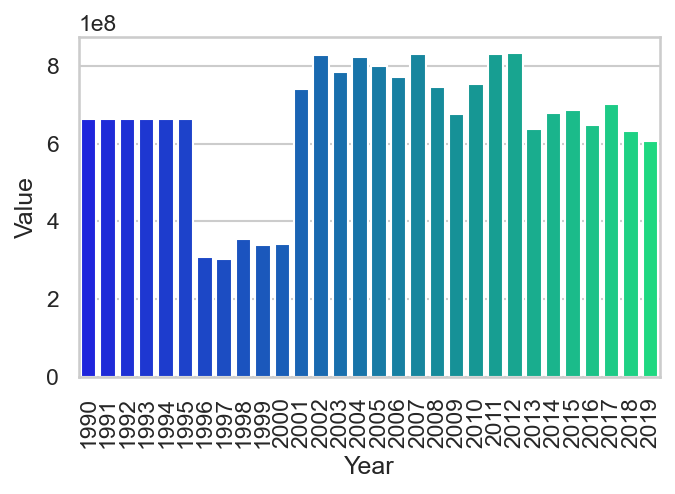

In [174]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
sns.barplot(x=s.index,y='Value',data=s, palette="winter")
plt.xticks(rotation=90)

# Total land affected by fire in a country

In [175]:
a=df.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(30)
a

,Year Code,Year,Value
Area,,,
Australia,420945,420945,2.650662e+09
Angola,420945,420945,1.927834e+09
Democratic Republic of the Congo,420945,420945,1.698499e+09
Sudan (former),308077,308077,1.304401e+09
Zambia,420945,420945,1.204405e+09
Mozambique,420945,420945,1.040799e+09
Central African Republic,420945,420945,9.843985e+08
Brazil,420945,420945,8.904736e+08
United Republic of Tanzania,420945,420945,6.783696e+08


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Democratic Republic of the Congo'),
  Text(3, 0, 'Sudan (former)'),
  Text(4, 0, 'Zambia'),
  Text(5, 0, 'Mozambique'),
  Text(6, 0, 'Central African Republic'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'United Republic of Tanzania'),
  Text(9, 0, 'Russian Federation'),
  Text(10, 0, 'Chad'),
  Text(11, 0, 'Kazakhstan'),
  Text(12, 0, 'South Sudan'),
  Text(13, 0, 'Mali'),
  Text(14, 0, 'Botswana'),
  Text(15, 0, 'Nigeria'),
  Text(16, 0, 'Ghana'),
  Text(17, 0, 'Ethiopia'),
  Text(18, 0, 'Madagascar'),
  Text(19, 0, 'Namibia'),
  Text(20, 0, 'Guinea'),
  Text(21, 0, 'Senegal'),
  Text(22, 0, 'South Africa'),
  Text(23, 0, 'Bolivia (Plurinational State of)'),
  Text(24, 0, 'Argentina'),
  Text(25, 0, 'Cameroon'),
  Text(26, 0, 'Zimbabwe'),
  Text(27, 0, 'Myanmar'),
  Text(28, 0, 'Congo'),
 

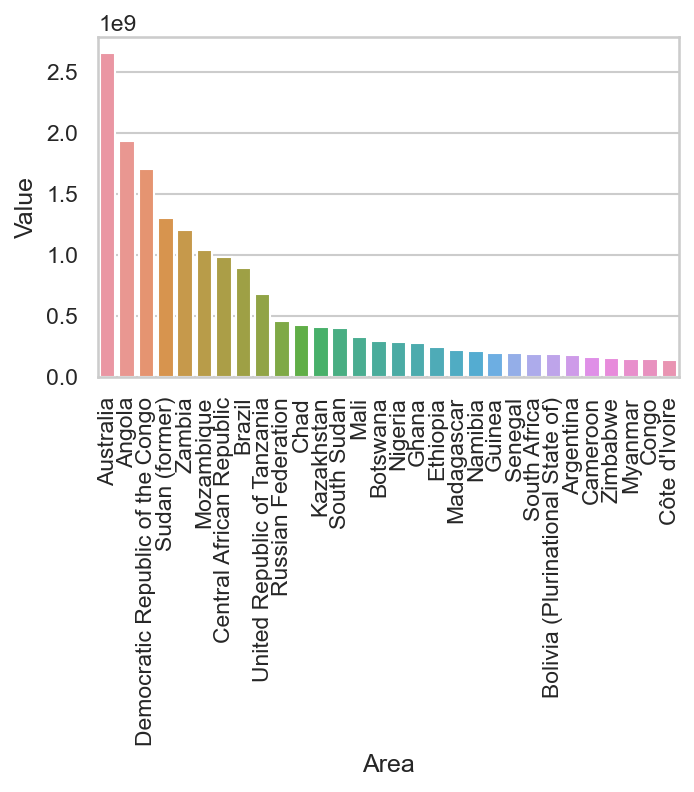

In [176]:
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
sns.barplot(x=a.index,y='Value',data=a)
plt.xticks(rotation=90)

# Item type burned by fire over years

In [177]:
b=df.groupby(["Item"]).sum().sort_values(by="Value", ascending=False)
b

,Year Code,Year,Value
Item,,,
Savanna,13645560,13645560,7.831523e+09
Grassland,13645560,13645560,6.801505e+09
Woody savanna,13645560,13645560,1.957280e+09
Open shrubland,13645560,13645560,1.365417e+09
Humid tropical forest,13645560,13645560,1.132681e+09
Other forest,13645560,13645560,4.478974e+08
Closed shrubland,13645560,13645560,9.897531e+07


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Savanna'),
  Text(1, 0, 'Grassland'),
  Text(2, 0, 'Woody savanna'),
  Text(3, 0, 'Open shrubland'),
  Text(4, 0, 'Humid tropical forest'),
  Text(5, 0, 'Other forest'),
  Text(6, 0, 'Closed shrubland')])

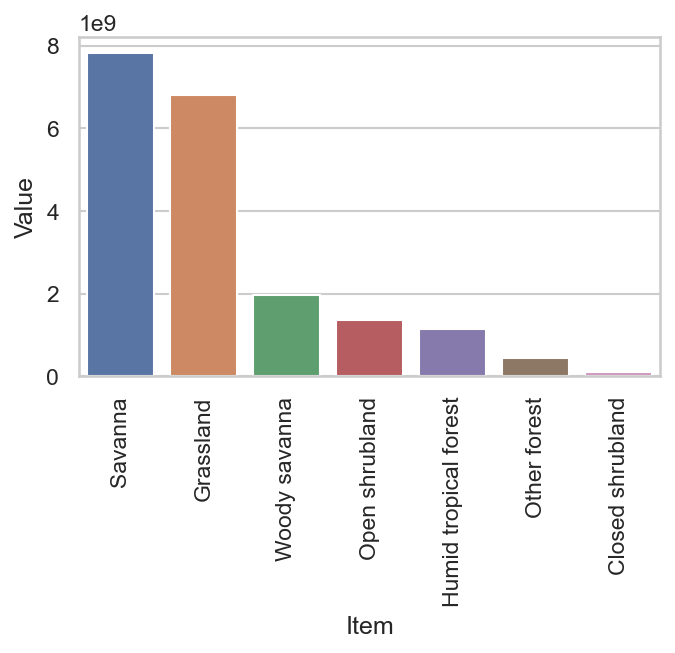

In [178]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=b.index,y='Value',data=b)
plt.xticks(rotation=90)

# Maximum area burned in a year in a country

In [179]:
c=df.groupby(["Year","Area"]).sum().sort_values(by="Value", ascending=False).head(30)
c

,,Year Code,Value
Year,Area,,
2001,Australia,14007,1.840483e+08
2012,Australia,14084,1.783090e+08
2011,Australia,14077,1.737702e+08
2002,Australia,14014,1.530490e+08
2004,Australia,14028,1.255536e+08
2006,Australia,14042,1.134671e+08
2007,Australia,14049,1.025287e+08
2018,Australia,14126,1.013396e+08
2017,Australia,14119,9.615384e+07


# Item type burned most in a year

In [180]:
a=df.groupby(["Year","Item"]).sum().sort_values(by="Value", ascending=False).head(30)
a

,,Year Code,Value
Year,Item,,
2005,Savanna,457140,3.487667e+08
2003,Savanna,456684,3.414789e+08
2007,Savanna,459603,3.294614e+08
2004,Grassland,456912,3.285651e+08
2002,Grassland,456456,3.209670e+08
2007,Grassland,459603,3.209456e+08
2008,Savanna,459832,3.151744e+08
2010,Savanna,460290,3.136204e+08
2004,Savanna,456912,3.135659e+08


# Item burned in a country in a year

In [181]:
df.groupby(["Year","Area","Item"]).sum().sort_values(by="Value", ascending=False).head(30)

,,,Year Code,Value
Year,Area,Item,,
2011,Australia,Open shrubland,2011,1.052085e+08
2012,Australia,Open shrubland,2012,9.431891e+07
2001,Australia,Open shrubland,2001,9.156779e+07
2002,Australia,Open shrubland,2002,8.998342e+07
2001,Australia,Grassland,2001,7.639979e+07
2004,Australia,Grassland,2004,6.797964e+07
2012,Australia,Grassland,2012,6.456851e+07
2011,Australia,Grassland,2011,5.287709e+07
2017,Australia,Open shrubland,2017,5.209256e+07


In [182]:
df.groupby("Area").agg(["min", "max", "mean"])

C:\Users\Maliha\AppData\Local\Temp\ipykernel_8764\2173121518.py:1: FutureWarning:

['Domain', 'Area Code (ISO3)', 'Element', 'Item', 'Source', 'Unit'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Year Code                Year                    Value  \
                     min   max    mean   min   max    mean        min   
Area                                                                    
Afghanistan         1990  2019  2004.5  1990  2019  2004.5     0.0000   
Albania             1990  2019  2004.5  1990  2019  2004.5     0.0000   
Algeria             1990  2019  2004.5  1990  2019  2004.5     0.0000   
American Samoa      1990  2019  2004.5  1990  2019  2004.5     0.0000   
Andorra             1990  2019  2004.5  1990  2019  2004.5     0.0000   
...                  ...   ...     ...   ...   ...     ...        ...   
Western Sahara      1990  2019  2004.5  1990  2019  2004.5     0.0000   
Yemen               1990  2019  2004.5  1990  2019  2004.5     0.0000   
Yugoslav SFR        1990  1991  1990.5  1990  1991  1990.5     0.0000   
Zambia              1990  2019  2004.5  1990  2019  2004.5  2737.5183   
Zimbabwe            1990  2019  2004.5  1990  2019  2004.5     0.0000   

                                            
                         max          mean  
Area                                        
Afghanistan     2.254087e+05  4.784936e+03  
Albania         1.019093e+05  3.268111e+03  
Algeria         2.527415e+05  1.978086e+04  
American Samoa  0.000000e+00  0.000000e+00  
Andorra         0.000000e+00  0.000000e+00  
...                      ...           ...  
Western Sahara  0.000000e+00  0.000000e+00  
Yemen           1.283223e+02  2.648193e+00  
Yugoslav SFR    3.824778e+04  9.658496e+03  
Zambia          2.820653e+07  5.735263e+06  
Zimbabwe        6.943403e+06  7.475783e+05  

[238 rows x 9 columns]

# Fire data for selected countries

In [183]:
df_selected = df[df["Area"].isin(["India", "Afghanistan", "Pakistan","Bangladesh"])]

In [184]:
df_selected.head()

,Domain,Area Code (ISO3),Area,Element,Item,Year Code,Year,Source,Unit,Value
0,Fires,AFG,Afghanistan,Burned Area,Humid tropical forest,1990,1990,FAO TIER 1,ha,0.0
1,Fires,AFG,Afghanistan,Burned Area,Humid tropical forest,1991,1991,FAO TIER 1,ha,0.0
2,Fires,AFG,Afghanistan,Burned Area,Humid tropical forest,1992,1992,FAO TIER 1,ha,0.0
3,Fires,AFG,Afghanistan,Burned Area,Humid tropical forest,1993,1993,FAO TIER 1,ha,0.0
4,Fires,AFG,Afghanistan,Burned Area,Humid tropical forest,1994,1994,FAO TIER 1,ha,0.0


In [185]:
df_selected.describe()

,Year Code,Year,Value
count,840.000000,840.000000,8.400000e+02
mean,2004.500000,2004.500000,8.335564e+04
std,8.660598,8.660598,2.478279e+05
min,1990.000000,1990.000000,0.000000e+00
25%,1997.000000,1997.000000,0.000000e+00
50%,2004.500000,2004.500000,6.429788e+02
75%,2012.000000,2012.000000,2.200130e+04
max,2019.000000,2019.000000,2.609465e+06


In [186]:
df_selected.groupby("Area").sum().sort_values(by="Value", ascending=False)

,Year Code,Year,Value
Area,,,
India,420945,420945,6.546250e+07
Bangladesh,420945,420945,2.536032e+06
Pakistan,420945,420945,1.015368e+06
Afghanistan,420945,420945,1.004836e+06


<AxesSubplot:xlabel='Year', ylabel='Value'>

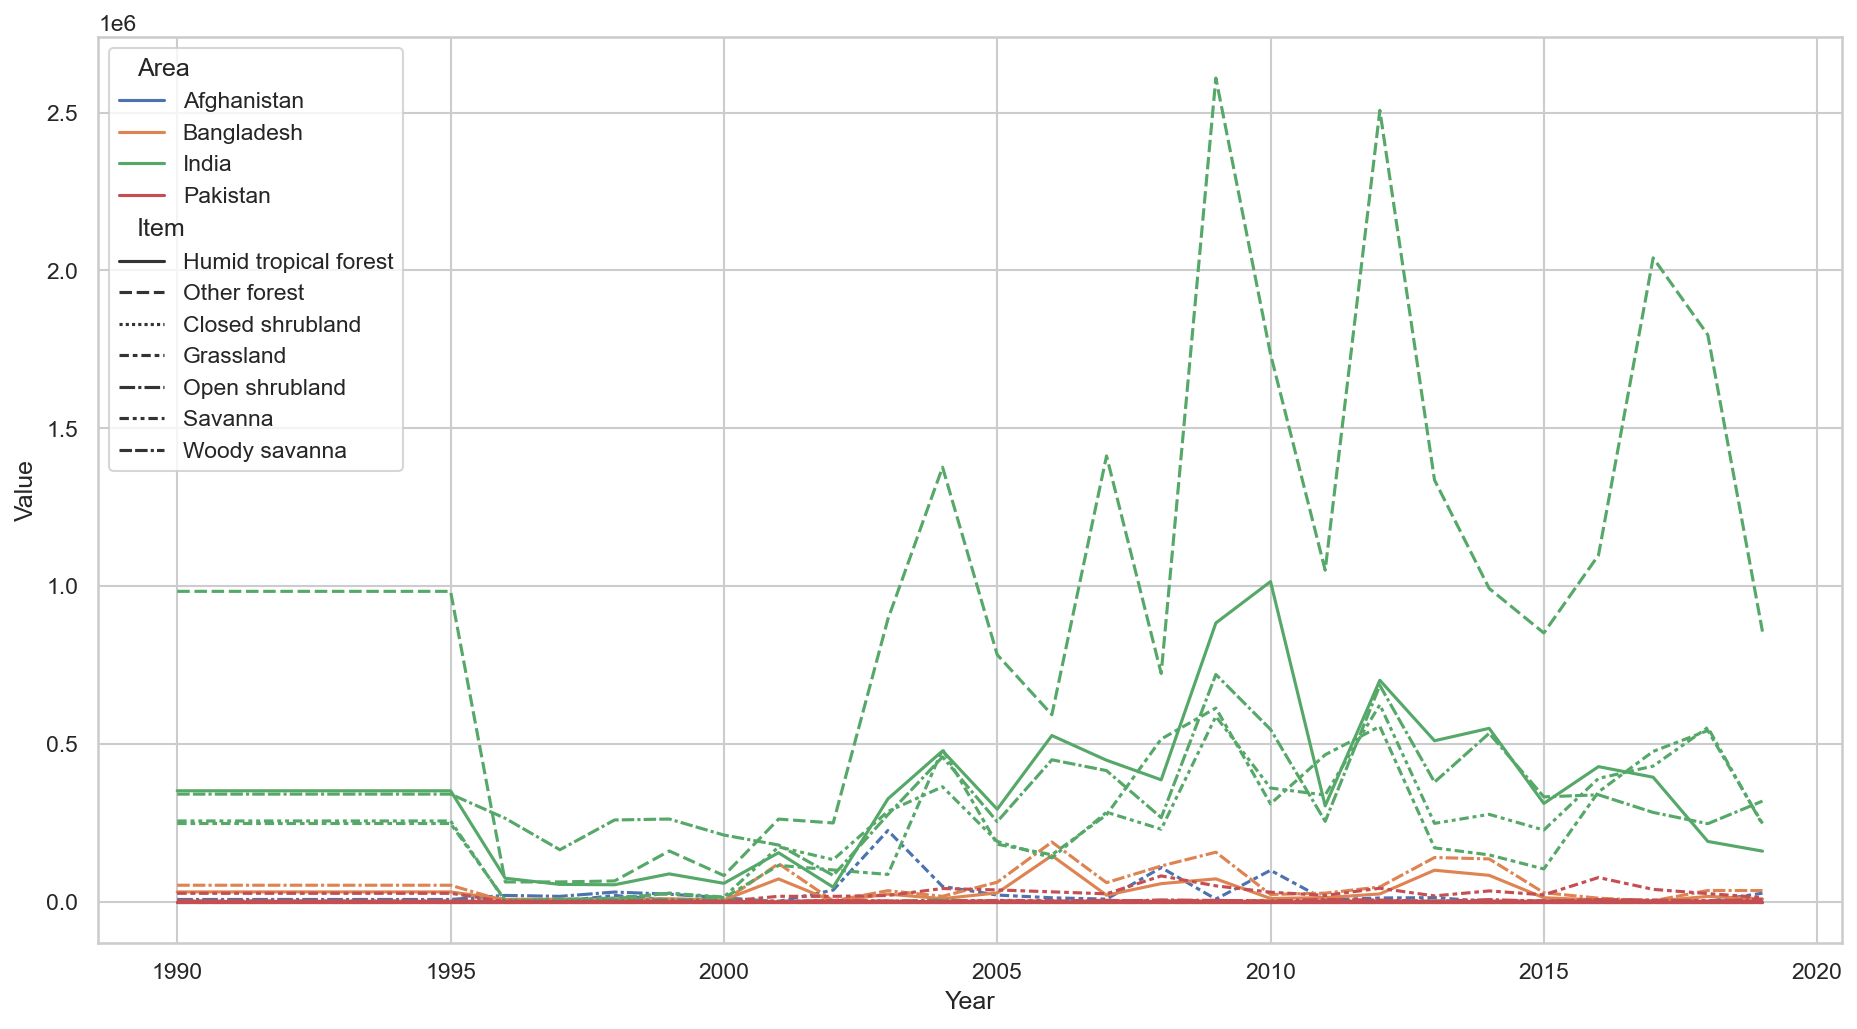

In [187]:
plt.figure(figsize=(15,8), dpi=150)
sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.lineplot(x="Year",y="Value",hue="Area",style="Item",data=df_selected)

In [188]:
df_selected.groupby("Item").sum().sort_values(by="Value", ascending=False)

,Year Code,Year,Value
Item,,,
Other forest,240540,240540,2.952522e+07
Woody savanna,240540,240540,1.180380e+07
Humid tropical forest,240540,240540,1.146947e+07
Grassland,240540,240540,9.088783e+06
Savanna,240540,240540,7.766206e+06
Open shrubland,240540,240540,3.090104e+05
Closed shrubland,240540,240540,5.624728e+04


In [189]:
df_selected.groupby("Year").sum().sort_values(by="Value", ascending=False)

,Year Code,Value
Year,,
2009,56252,5.714089e+06
2012,56336,5.213439e+06
2010,56280,4.137277e+06
2017,56476,3.678856e+06
2018,56504,3.413934e+06
2004,56112,3.287813e+06
2007,56196,2.961845e+06
2013,56364,2.921003e+06
2014,56392,2.766442e+06


In [190]:
df_selected.groupby(["Area","Item"]).sum().sort_values(by="Value", ascending=False)

Year Code   Year         Value
Area        Item                                                 
India       Other forest               60135  60135  2.949751e+07
            Humid tropical forest      60135  60135  1.054195e+07
            Woody savanna              60135  60135  1.022475e+07
            Savanna                    60135  60135  7.673059e+06
            Grassland                  60135  60135  7.432449e+06
Bangladesh  Woody savanna              60135  60135  1.564979e+06
            Humid tropical forest      60135  60135  9.275118e+05
Afghanistan Grassland                  60135  60135  8.392036e+05
Pakistan    Grassland                  60135  60135  8.039774e+05
Afghanistan Open shrubland             60135  60135  1.536448e+05
Pakistan    Open shrubland             60135  60135  9.278010e+04
India       Open shrubland             60135  60135  6.255090e+04
Pakistan    Savanna                    60135  60135  5.921940e+04
India       Closed shrubland           60135  60135  3.024031e+04
Bangladesh  Savanna                    60135  60135  3.012942e+04
Pakistan    Other forest               60135  60135  2.740336e+04
            Closed shrubland           60135  60135  1.964518e+04
Bangladesh  Grassland                  60135  60135  1.315308e+04
Pakistan    Woody savanna              60135  60135  1.234210e+04
Afghanistan Closed shrubland           60135  60135  6.137393e+03
            Savanna                    60135  60135  3.798409e+03
            Woody savanna              60135  60135  1.737076e+03
            Other forest               60135  60135  3.151839e+02
Bangladesh  Closed shrubland           60135  60135  2.243958e+02
            Open shrubland             60135  60135  3.454350e+01
            Other forest               60135  60135  0.000000e+00
Pakistan    Humid tropical forest      60135  60135  0.000000e+00
Afghanistan Humid tropical forest      60135  60135  0.000000e+00

<AxesSubplot:xlabel='Area', ylabel='Value'>

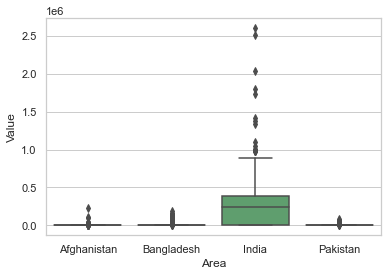

In [191]:
sns.boxplot(x="Area",y="Value",data=df_selected)